In [1]:
import dill as pickle
import xarray as xr
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def findaAllFiles(folder="InitialData",extn ="/*.nc"):
    """
    Note: find the data file inside a given folder
    """

    mydir = os.getcwd()
    mydir = mydir[0:-len(mydir.split('/')[-1])-1]
    mydir = os.path.join(mydir,folder)
    try:
        os.mkdir(mydir)
        print('New folder added:',mydir)
    except(FileExistsError):
        pass

    files = []
    for file in glob.glob(mydir+extn):
        files.append(file)

    return files

def findPath(folder="InitialData"):
    """
    Note: find the data file inside a given folder
    """

    mydir = os.getcwd()
    mydir = mydir[0:-len(mydir.split('/')[-1])-1]
    mydir = os.path.join(mydir,folder)

    return mydir



def update_xarray(sample_ds,output_tensor,filename,folder="Data"):
    
    
    sample_ds["true_latitude"] = 0*sample_ds.latitude.copy(deep=True)
    sample_ds["true_latitude"] += output_tensor[0,:,:]

    sample_ds["true_longitude"] = 0*sample_ds.longitude.copy(deep=True)
    sample_ds["true_longitude"] += output_tensor[1,:,:]


    comp = {"zlib": True, "complevel": 9} # < very small file (just takes a bit of time to write)
    encoding = {var: comp for var in sample_ds.data_vars}

    # write to file
    mypath = os.getcwd()
    mypath = mypath[0:-len(mypath.split('/')[-1])-1]
    mypath = os.path.join(mypath,folder)
    file = filename.split('/')[-1]
    try:
        os.mkdir(mypath)
        print('New folder added:',mypath)
    except(FileExistsError):
        pass
    sample_ds.to_netcdf(mypath+f"/new_{file}", encoding=encoding)
    print(f'{file} is updated to {mypath}/new_{file}!')

    
def find_paired_Data(infname,folder = "InitialData"):
    mypath = findPath(folder=folder)
    infname_str = infname.split('/')[-1]
    print('split one',infname_str)
    if "new" in infname_str:
        pair_fname = glob.glob(mypath+f"/*{infname_str[0:-8]}.nc")
        print(f"/{infname_str[0:-8]}.nc")
        print(pair_fname)
    else:
        pair_fname = glob.glob(mypath+f"/*{infname_str}")
    
    return pair_fname[0]


def extract_tensor(sample_ds):
    # extract date to numpy arrays
    heights = sample_ds.cloud_edge_height.values 
    lats = sample_ds.latitude.values
    lons = sample_ds.longitude.values
    theta = sample_ds.theta_view.values
    phi = sample_ds.phi_view.values

    print(heights.shape)
    print(lats.shape)
    print(lons.shape)
    print(theta.shape)
    print(phi.shape)

    # from bottom to top lat, lons, heights, theta, phi
    input_tensor = np.stack([lats,lons,heights,theta,phi], axis=0)
    print('shape of input tensor: ',input_tensor.shape)
    return input_tensor


def scatterPlot(output_tensor,input_tensor,filename):
    namelists = filename.split('/')
    print(namelists)
    lons = output_tensor[1,:,:].flatten()         # 1D numpy
    lats = output_tensor[0,:,:].flatten()          # 1D numpy
    cths = input_tensor[2,:,:].flatten() # 1D numpy

    ## Then, you can e.g. simply do (nb: points plotted individually):
    plt.figure(figsize=(15,10))
    plt.scatter(lons, lats, c=cths, cmap='magma', s=0.1)
    plt.title(namelists[-1])
    plt


In [3]:
filenames = findaAllFiles(folder="Output",extn ="/*.pkl")
filenames

['/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_01_10_A4_new.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_02_10_A3_new.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_06_10_B5_new.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_03_10_A2_new.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_00_10_A5.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_04_10_A1_new.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_01_10_A4.pkl',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_00_

In [4]:
filenames_x = findaAllFiles(folder="InitialData",extn ="/*.nc")
filenames_x 

['/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_03_10_B2.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_04_10_B3.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_03_10_A2.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_04_10_A1.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_05_10_B4.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_02_10_B1.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_01_10_A4.nc',
 '/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Initi

In [5]:
filenumber = int(input('Give a digit between 0 and 9 to load a file.'))
print(filenames[filenumber])
infname = filenames[filenumber]
if "new" in infname:
    
    ncfname = find_paired_Data(infname,folder = "InitialData")
    print('nc filename: ',ncfname)
    with open(infname,'rb') as file:
        data = pickle.load(file)
        print(data)

    height = data["height"]
    true_lon = data["lon"]
    true_lat = data["lat"]

    output_tensor = np.stack([true_lat,true_lon],axis=0)

    sample_ds = xr.load_dataset(ncfname, engine="netcdf4")
    update_xarray(sample_ds,output_tensor,ncfname,folder="Data")

    # plt.figure(figsize=(16,10))
    # plt.contourf(lon,lat,height,levels=30)
    # plt.title(infname.split('/')[-1])
    # plt.savefig(f"{infname.split('/')[-1]}.png",dpi=300)

Give a digit between 0 and 9 to load a file. 17


/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Output/12_04_10_B3_new.pkl
split one 12_04_10_B3_new.pkl
/12_04_10_B3.nc
['/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_04_10_B3.nc']
nc filename:  /home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/InitialData/12_04_10_B3.nc
{'lat': array([[13.56894967, 13.56895158, 13.56895233, ..., 13.5689528 ,
        13.56895089, 13.56895089],
       [13.56985355, 13.56985451, 13.56985641, ..., 13.56985593,
        13.56985497, 13.56985497],
       [13.57075668, 13.57075859, 13.57076049, ..., 13.57076001,
        13.57075791, 13.57075791],
       ...,
       [14.13564893, 14.13565084, 14.13597336, ..., 14.13562679,
        14.13562489, 14.13562489],
       [14.13655302, 14.13655492, 14.13687745, ..., 14.13653088,
        14.13652897, 14.13652897],
       [14.13745689, 14.13774486, 14.1377458

split one 12_04_10_B3_new.pkl
/12_04_10_B3.nc
['/home/yz3259/Documents/Python_Jupyter_projects/SWI2023/swi-challenge-2023-netcdf-tutorial-master/Data/new_12_04_10_B3.nc']


<xarray.Dataset>
Dimensions:            (iy: 630, ix: 1000)
Coordinates:
  * ix                 (ix) int64 999 998 997 996 995 994 993 ... 6 5 4 3 2 1 0
  * iy                 (iy) int64 0 1 2 3 4 5 6 ... 623 624 625 626 627 628 629
Data variables:
    cloud_edge_height  (iy, ix) float32 0.0675 0.0675 0.0675 ... nan nan nan
    latitude           (iy, ix) float64 13.57 13.57 13.57 ... 14.14 14.14 14.14
    longitude          (iy, ix) float64 301.3 301.3 301.3 ... 300.4 300.4 300.4
    theta_view         (iy, ix) float32 140.9 140.9 140.9 140.9 ... nan nan nan
    phi_view           (iy, ix) float32 92.21 92.21 92.19 92.19 ... nan nan nan
    y_DALES            (iy) float32 0.0 0.1 0.2 0.3 0.4 ... 62.6 62.7 62.8 62.9
    x_DALES            (ix) float32 99.95 99.85 99.75 99.65 ... 0.25 0.15 0.05
    true_latitude      (iy, ix) float64 13.57 13.57 13.57 ... 14.14 14.14 14.14
    true_longitude     (iy, ix) float64 301.3 301.3 301.3 ... 300.4 300.4 300.4
Attributes:
    scene:     DALES_highres PAN
    timeslot:  12_04_10
    view:      B3

(630, 1000)
(630, 1000)
(630, 1000)
(630, 1000)
(630, 1000)
shape of input tensor:  (5, 630, 1000)
this is stored data
['', 'home', 'yz3259', 'Documents', 'Python_Jupyter_projects', 'SWI2023', 'swi-challenge-2023-netcdf-tutorial-master', 'Data', 'new_12_04_10_B3.nc']


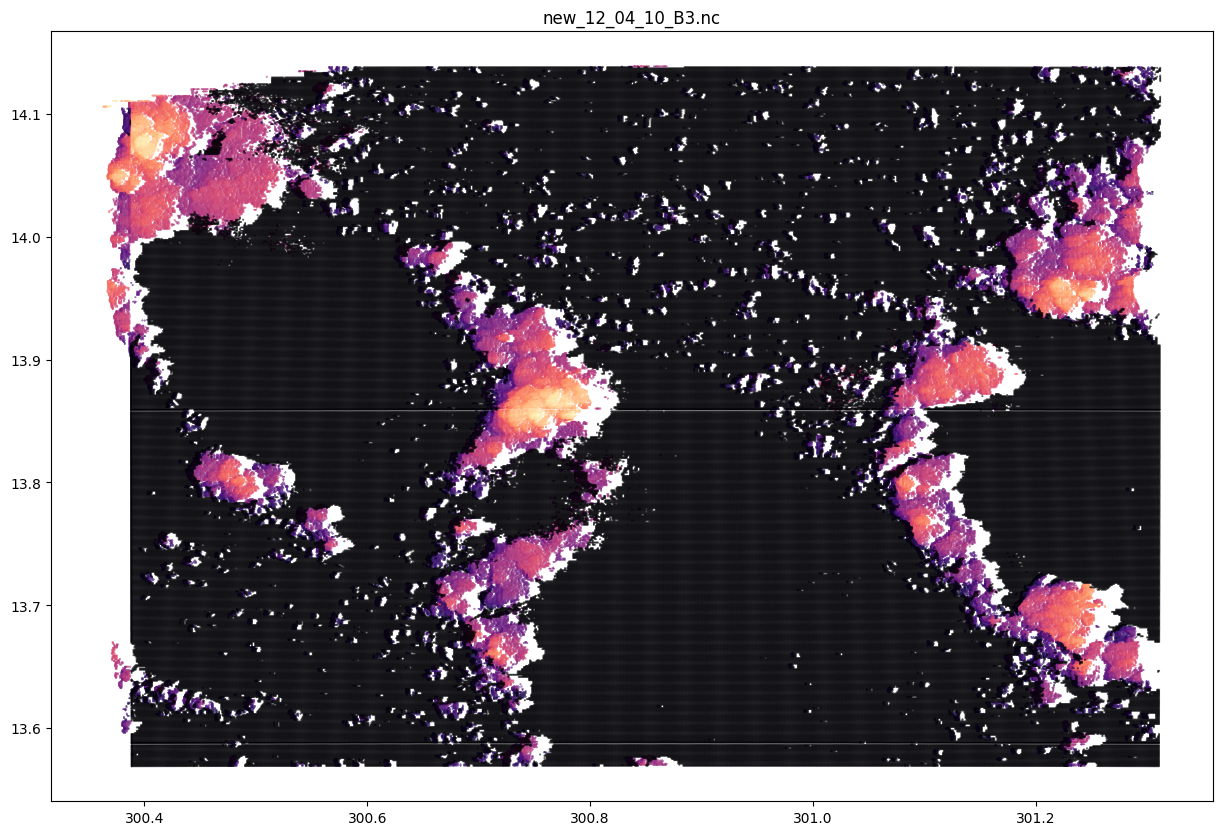

In [6]:
filename = find_paired_Data(infname,folder = "Data")
sample_ds = xr.load_dataset(filename, engine="netcdf4")
# NB: - open_dataset opens lazily and turns the .nc file to read-only until the corresp. ds has been .closed().
#     - load_dataset loads all the .nc contents into memory closes the .nc file immediately after.

# info for that xr.Dataset:
display(sample_ds)
true_lat = sample_ds.true_latitude.values
true_lon = sample_ds.true_longitude.values
data = np.stack([true_lat,true_lon],axis=0)
data.shape
input_tensor = extract_tensor(sample_ds)

print('this is stored data')
scatterPlot(data,input_tensor,filename)

In [30]:
# rename .nc files
if False:
    
    mypath = findPath(folder='Data')
    title = 'true_position'
    for filename in os.listdir(mypath):
        print(filename[4:])
        print(filename.split('_'))
        for string in filename.split('_'):
            try:
                int(string)
                idx = filename.find(string)
              #  print(idx)
                break
            except ValueError:
                continue

        dst = f"{title}_{filename[idx:]}"
        os.rename(os.path.join(mypath,filename),os.path.join(mypath,dst))



In [36]:
# rename .pkl files
if False:
    mypath = findPath(folder='Output')
    title2 = 'regridded_position'
    title1 = 'true_latlon'
    for filename in os.listdir(mypath):

        print(filename.split('_'))
        for string in filename.split('_'):
            try:
                int(string)
                idx = filename.find(string)
              #  print(idx)
                break
            except ValueError:
                continue

        if 'new' in filename:
            print(filename.split('_'))
            idx2 = filename.find('new')
            dst = f"{title1}_{filename[idx:idx2-1]}.pkl"
            print('dst: ',dst)
        else:
            dst = f"{title2}_{filename[idx:]}"
            print('dst: ',dst)
        
        os.rename(os.path.join(mypath,filename),os.path.join(mypath,dst))



['12', '01', '10', 'A4', 'new.pkl']
['12', '01', '10', 'A4', 'new.pkl']
dst:  true_latlon_12_01_10_A4.pkl
['12', '02', '10', 'A3', 'new.pkl']
['12', '02', '10', 'A3', 'new.pkl']
dst:  true_latlon_12_02_10_A3.pkl
['12', '06', '10', 'B5', 'new.pkl']
['12', '06', '10', 'B5', 'new.pkl']
dst:  true_latlon_12_06_10_B5.pkl
['12', '03', '10', 'A2', 'new.pkl']
['12', '03', '10', 'A2', 'new.pkl']
dst:  true_latlon_12_03_10_A2.pkl
['12', '00', '10', 'A5.pkl']
dst:  regridded_position_12_00_10_A5.pkl
['12', '04', '10', 'A1', 'new.pkl']
['12', '04', '10', 'A1', 'new.pkl']
dst:  true_latlon_12_04_10_A1.pkl
['12', '01', '10', 'A4.pkl']
dst:  regridded_position_12_01_10_A4.pkl
['12', '00', '10', 'A5', 'new.pkl']
['12', '00', '10', 'A5', 'new.pkl']
dst:  true_latlon_12_00_10_A5.pkl
['12', '06', '10', 'B5.pkl']
dst:  regridded_position_12_06_10_B5.pkl
['12', '03', '10', 'A2.pkl']
dst:  regridded_position_12_03_10_A2.pkl
['12', '05', '10', 'B4', 'new.pkl']
['12', '05', '10', 'B4', 'new.pkl']
dst:  true_l